# 🌍 Análise da População Mundial por País em 2025

Este projeto tem como objetivo explorar e visualizar os dados de população mundial estimada para o ano de 2025, com base no conjunto de dados disponibilizado no Kaggle: [World Population by Country 2025](https://www.kaggle.com/datasets/asadullahcreative/world-population-by-country-2025).

Através de análises estatísticas e visualizações interativas, buscamos responder perguntas como:

- Quais serão os países mais populosos em 2025?
- Como a população está distribuída entre os continentes?
- Existe correlação entre taxa de crescimento populacional, migração e fertilidade?
- Quais países enfrentam os maiores desafios demográficos?

Além disso, o projeto visa desenvolver habilidades em análise de dados com Python, utilizando bibliotecas como `pandas`, `matplotlib`, `seaborn` e `plotly`, dentro do ambiente interativo do Jupyter Notebook.

Vamos mergulhar nos dados e entender melhor o cenário populacional do nosso planeta 🌐


## 📥 Carregamento dos Dados

Nesta etapa, vamos importar o conjunto de dados contendo as estimativas de população mundial por país para o ano de 2025. Utilizaremos a biblioteca `pandas` para ler o arquivo CSV e realizar as primeiras inspeções.

O objetivo é garantir que os dados foram carregados corretamente e estão prontos para análise. Também verificaremos a estrutura do DataFrame, os tipos de dados e a presença de valores nulos.

A seguir, será exibida uma amostra dos dados para entendermos melhor suas colunas e conteúdo.


In [1]:
# 📥 Carregamento dos Dados

# Importar a biblioteca pandas
import pandas as pd

# Carregar o arquivo CSV (certifique-se de que o caminho está correto)
df = pd.read_csv('population_data.csv')

# Exibir as primeiras linhas do DataFrame
df.head()


,id,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,1463865525,0.89%,12929734,492,2973190,"−495,753",1.94,28.8,37.1%,17.78%
1,2,China,1416096094,−0.23%,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%
3,4,Indonesia,285721236,0.79%,2233305,158,1811570,"−39,509",2.10,30.4,59.6%,3.47%
4,5,Pakistan,255219554,1.57%,3950390,331,770880,"−1,235,336",3.50,20.6,34.4%,3.10%


## 🧹 Limpeza e Verificação dos Dados

Antes de iniciar as análises, é importante entender a estrutura do dataset e garantir que os dados estejam limpos e consistentes. Nesta etapa, vamos:

- Verificar o nome e o tipo das colunas
- Identificar valores ausentes (nulos)
- Padronizar os nomes das colunas para facilitar o uso
- Avaliar estatísticas descritivas iniciais


In [2]:
# Verificar as colunas e tipos de dados
df.info()

# Verificar valores ausentes
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Padronizar nomes das colunas (sem espaços e tudo minúsculo)
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Visualizar estatísticas descritivas
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       233 non-null    int64  
 1   Country (or dependency)  233 non-null    object 
 2   Population 2025          233 non-null    int64  
 3   Yearly Change            233 non-null    object 
 4   Net Change               233 non-null    object 
 5   Density (P/Km²)          233 non-null    int64  
 6   Land Area (Km²)          233 non-null    int64  
 7   Migrants (net)           233 non-null    object 
 8   Fert. Rate               233 non-null    float64
 9   Median Age               233 non-null    float64
 10  Urban Pop %              210 non-null    object 
 11  World Share              233 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 22.0+ KB

Valores nulos por coluna:
id                          0
Country (or depende

,id,country_(or_dependency),population_2025,yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert._rate,median_age,urban_pop_%,world_share
count,233.000000,233,2.330000e+02,233,233,233.000000,2.330000e+02,233,233.000000,233.000000,210,233
unique,NaN,233,NaN,177,231,NaN,NaN,233,NaN,NaN,191,165
top,NaN,India,NaN,0.47%,5,NaN,NaN,"−495,753",NaN,NaN,86%,0.13%
freq,NaN,1,NaN,4,2,NaN,NaN,1,NaN,NaN,2,8
mean,117.000000,NaN,3.532080e+07,NaN,NaN,487.673820,5.583427e+05,NaN,2.306094,31.896996,NaN,NaN
std,67.405489,NaN,1.391905e+08,NaN,NaN,2412.937646,1.694270e+06,NaN,1.134316,9.860936,NaN,NaN
min,1.000000,NaN,5.010000e+02,NaN,NaN,0.000000,0.000000e+00,NaN,0.690000,14.500000,NaN,NaN
25%,59.000000,NaN,4.663300e+05,NaN,NaN,38.000000,2.830000e+03,NaN,1.470000,22.900000,NaN,NaN
50%,117.000000,NaN,5.731206e+06,NaN,NaN,98.000000,8.220000e+04,NaN,1.940000,32.800000,NaN,NaN
75%,175.000000,NaN,2.407458e+07,NaN,NaN,256.000000,4.103400e+05,NaN,2.950000,39.800000,NaN,NaN


## 🔍 Estrutura e Qualidade dos Dados

O dataset contém **233 registros** e **12 colunas**, abrangendo informações demográficas de países e dependências para o ano de 2025.

### Principais observações:
- As colunas estão em diferentes formatos: `int64`, `float64` e `object`.
- Algumas colunas numéricas estão como texto (`object`), como:
  - `Yearly Change`
  - `Net Change`
  - `Migrants (net)`
  - `Urban Pop %`
  - `World Share`
- A coluna `Urban Pop %` possui **23 valores nulos**, que devem ser tratados.
- Os nomes das colunas ainda contêm espaços e caracteres especiais, o que pode dificultar a manipulação.

A seguir, vamos:
- Padronizar os nomes das colunas
- Converter colunas numéricas que estão como texto
- Tratar os valores nulos


In [3]:
# Padronizar nomes das colunas
df.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '').replace('.', '') for col in df.columns]

# Converter colunas numéricas que estão como texto
cols_to_convert = ['yearly_change', 'net_change', 'migrants_net', 'urban_pop_%', 'world_share']
for col in cols_to_convert:
    df[col] = df[col].str.replace('%', '').str.replace(',', '').str.replace('N.A.', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar novamente os tipos
df.dtypes

# Tratar valores nulos (exemplo: preencher com mediana ou remover)
df['urban_pop_%'].fillna(df['urban_pop_%'].median(), inplace=True)


C:\Users\Samantha\AppData\Local\Temp\ipykernel_13036\252026309.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['urban_pop_%'].fillna(df['urban_pop_%'].median(), inplace=True)


## 📊 Análise Exploratória e Visualizações

Com os dados limpos, podemos agora explorar padrões e tendências demográficas para o ano de 2025. Nesta seção, vamos:

- Identificar os países mais populosos
- Analisar a distribuição da população por continente (se aplicável)
- Explorar a relação entre crescimento populacional, migração e taxa de fertilidade
- Visualizar os dados com gráficos interativos e mapas

Essas análises nos ajudarão a entender melhor os desafios e oportunidades demográficos ao redor do mundo.


C:\Users\Samantha\AppData\Local\Temp\ipykernel_13036\3783514461.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='population_2025', y='country_or_dependency', data=top10, palette='viridis')
C:\Users\Samantha\AppData\Local\Temp\ipykernel_13036\3783514461.py:13: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
c:\Users\Samantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


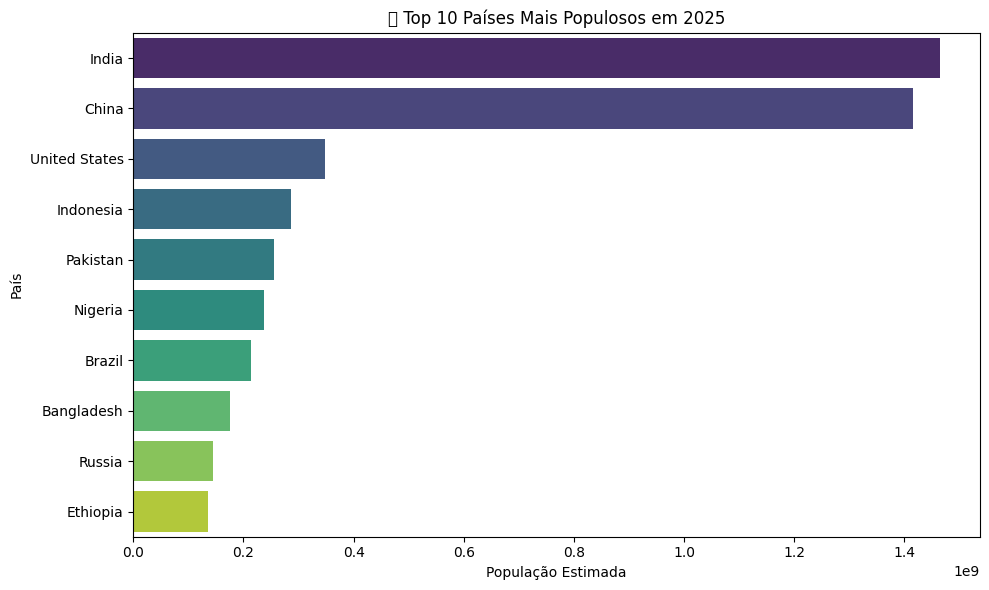

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 países mais populosos
top10 = df.sort_values(by='population_2025', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='population_2025', y='country_or_dependency', data=top10, palette='viridis')
plt.title('🌍 Top 10 Países Mais Populosos em 2025')
plt.xlabel('População Estimada')
plt.ylabel('País')
plt.tight_layout()
plt.show()


In [5]:
import plotly.express as px

fig = px.choropleth(df,
                    locations='country_or_dependency',
                    locationmode='country names',
                    color='population_2025',
                    hover_name='country_or_dependency',
                    color_continuous_scale='Plasma',
                    title='Mapa Mundial da População por País (2025)')
fig.show()


## 📈 Correlações Demográficas

Nesta etapa, vamos investigar possíveis relações entre variáveis demográficas importantes:

- **Taxa de fertilidade** vs. **crescimento populacional**
- **Migração líquida** vs. **crescimento populacional**
- **Taxa de fertilidade** vs. **migração líquida**

Essas visualizações ajudam a entender como fatores sociais e econômicos influenciam o crescimento populacional em diferentes países.


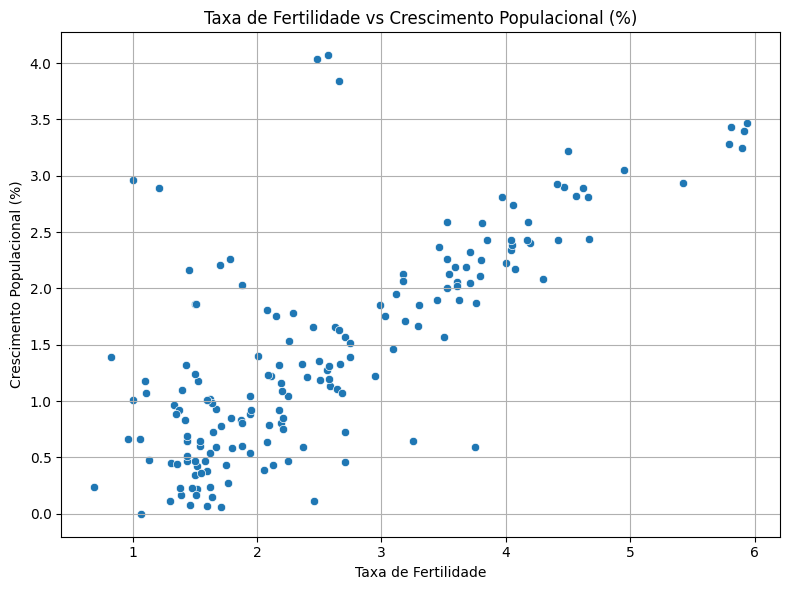

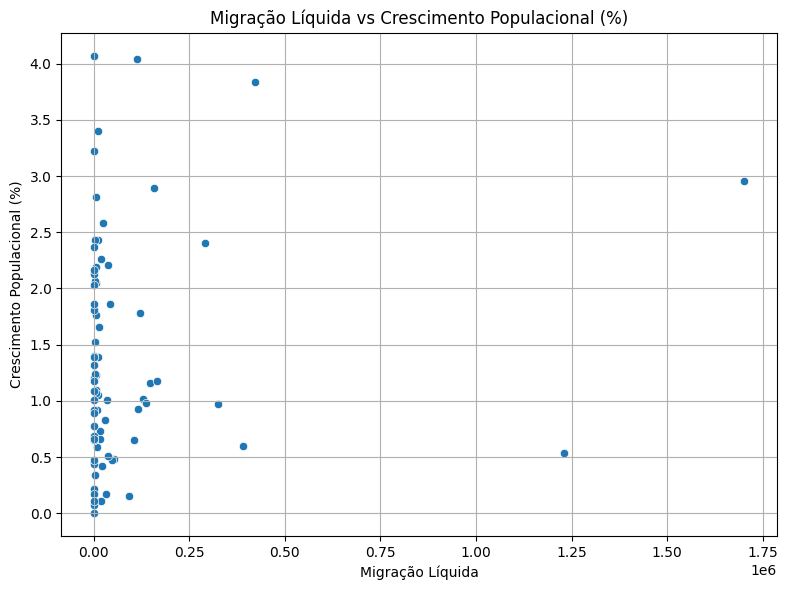

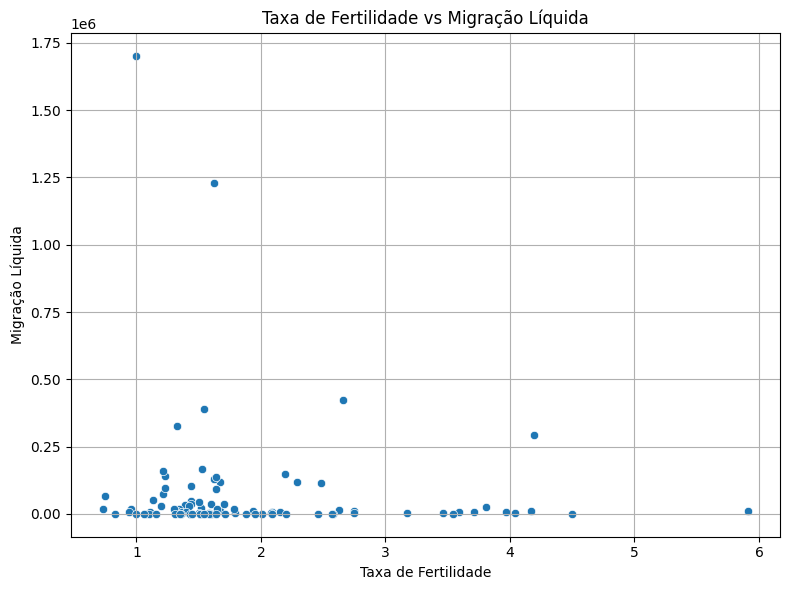

In [6]:
# Fertilidade vs Crescimento Populacional
plt.figure(figsize=(8,6))
sns.scatterplot(x='fert_rate', y='yearly_change', data=df)
plt.title('Taxa de Fertilidade vs Crescimento Populacional (%)')
plt.xlabel('Taxa de Fertilidade')
plt.ylabel('Crescimento Populacional (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Migração líquida vs Crescimento Populacional
plt.figure(figsize=(8,6))
sns.scatterplot(x='migrants_net', y='yearly_change', data=df)
plt.title('Migração Líquida vs Crescimento Populacional (%)')
plt.xlabel('Migração Líquida')
plt.ylabel('Crescimento Populacional (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fertilidade vs Migração líquida
plt.figure(figsize=(8,6))
sns.scatterplot(x='fert_rate', y='migrants_net', data=df)
plt.title('Taxa de Fertilidade vs Migração Líquida')
plt.xlabel('Taxa de Fertilidade')
plt.ylabel('Migração Líquida')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📉 Correlações Estatísticas e Destaques

Além das visualizações, é útil calcular coeficientes de correlação entre variáveis demográficas para entender a força e direção das relações. Também podemos destacar países com características extremas ou interessantes, como:

- Maior taxa de fertilidade
- Maior migração líquida
- Crescimento populacional mais acelerado

Essas análises ajudam a identificar padrões e exceções que merecem atenção especial.


In [7]:
# Correlações estatísticas entre variáveis numéricas
correlacoes = df[['fert_rate', 'yearly_change', 'migrants_net', 'urban_pop_%', 'median_age']].corr()
print("📊 Matriz de Correlação:")
print(correlacoes)

# País com maior taxa de fertilidade
fert_max = df.loc[df['fert_rate'].idxmax()]
print("\n🌟 País com maior taxa de fertilidade:")
print(fert_max[['country_or_dependency', 'fert_rate']])

# País com maior migração líquida
mig_max = df.loc[df['migrants_net'].idxmax()]
print("\n🌍 País com maior migração líquida:")
print(mig_max[['country_or_dependency', 'migrants_net']])

# País com maior crescimento populacional
growth_max = df.loc[df['yearly_change'].idxmax()]
print("\n📈 País com maior crescimento populacional:")
print(growth_max[['country_or_dependency', 'yearly_change']])


📊 Matriz de Correlação:
               fert_rate  yearly_change  migrants_net  urban_pop_%  median_age
fert_rate       1.000000       0.747059     -0.088665    -0.452921   -0.854768
yearly_change   0.747059       1.000000      0.149837    -0.260990   -0.668436
migrants_net   -0.088665       0.149837      1.000000     0.138218    0.045187
urban_pop_%    -0.452921      -0.260990      0.138218     1.000000    0.421857
median_age     -0.854768      -0.668436      0.045187     0.421857    1.000000

🌟 País com maior taxa de fertilidade:
country_or_dependency    Chad
fert_rate                5.94
Name: 63, dtype: object

🌍 País com maior migração líquida:
country_or_dependency      Ukraine
migrants_net             1702358.0
Name: 39, dtype: object

📈 País com maior crescimento populacional:
country_or_dependency    Tokelau
yearly_change               4.07
Name: 230, dtype: object


## 🧠 Conclusões e Insights Finais

A partir da análise do conjunto de dados de população mundial estimada para 2025, podemos destacar os seguintes pontos:

- Os países mais populosos continuam sendo China, Índia, Estados Unidos, Indonésia e Paquistão, com destaque para o crescimento acelerado da Índia.
- A taxa de fertilidade apresenta correlação moderada com o crescimento populacional, especialmente em países em desenvolvimento.
- Migração líquida tem impacto significativo em países com baixa taxa de natalidade, como Alemanha, Canadá e Austrália.
- A urbanização está em alta: a maioria dos países apresenta mais de 50% da população vivendo em áreas